In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
import random

In [4]:
train=pd.read_csv("/content/Train.csv",index_col='ID')
test=pd.read_csv("/content/Test.csv",index_col="ID")

In [5]:
train_length=train.shape[0]
test_length=test.shape[0]

In [ ]:
train.dtypes

Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [6]:
cleanup_nums={'Applicant_Gender':{'M':1,'F':0},'Manager_Gender':{'M':1,'F':0},'Applicant_Marital_Status':{'S':0,'M':1,'W':2,'D':3},
             'Applicant_Occupation':{'Others':0,'Salaried':1,'Business':2,'Self Employed':3,'Student':4},
             'Applicant_Qualification':{'Others':0,'Class XII':1,'Class X':2,'Graduate':3,'Masters of Business Administration':4,'Associate / Fellow of Institute of Chartered Accountans of India':5,
                                       'Associate/Fellow of Institute of Company Secretories of India':6,'Associate/Fellow of Acturial Society of India':7,'Certified Associateship of Indian Institute of Bankers':8,
                                       'Associate/Fellow of Insurance Institute of India':9,'Professional Qualification in Marketing':10,'Associate/Fellow of Institute of Institute of Costs and Works Accountants of India':11},
              'Manager_Joining_Designation':{'Other':0,'Level 1':1,'Level 2':2,'Level 3':3,'Level 4':4,'Level 5':5,'Level 6':6,'Level 7':7},
              'Manager_Current_Designation':{'Other':0,'Level 1':1,'Level 2':2,'Level 3':3,'Level 4':4,'Level 5':5,'Level 6':6,'Level 7':7},
              'Manager_Status':{'Probation':0,'Confirmation':1}
             }

In [7]:
train.replace(cleanup_nums,inplace=True)
test.replace(cleanup_nums,inplace=True)

In [8]:
train['Applicant_Gender'].value_counts()

1.0    7179
0.0    2281
Name: Applicant_Gender, dtype: int64

In [9]:
train['Manager_Gender'].value_counts()


1.0    7627
0.0    1217
Name: Manager_Gender, dtype: int64

In [10]:
train['Applicant_Marital_Status'].value_counts()

1.0    6177
0.0    3267
2.0       6
3.0       4
Name: Applicant_Marital_Status, dtype: int64

In [11]:
train['Applicant_Occupation'].value_counts()

1.0    3787
2.0    2303
0.0    1966
3.0     149
4.0     101
Name: Applicant_Occupation, dtype: int64

In [12]:
train['Applicant_Qualification'].value_counts()

1.0     5806
3.0     3196
2.0      225
0.0      132
4.0       74
5.0        3
9.0        1
10.0       1
8.0        1
7.0        1
6.0        1
Name: Applicant_Qualification, dtype: int64

In [13]:
train['Manager_Joining_Designation'].value_counts()

1.0    4632
2.0    2787
3.0    1146
4.0     200
0.0      58
6.0      18
7.0       2
5.0       1
Name: Manager_Joining_Designation, dtype: int64

In [14]:
train['Manager_Current_Designation'].value_counts()

2.0    3208
1.0    2479
3.0    2033
4.0    1031
5.0      93
Name: Manager_Current_Designation, dtype: int64

In [15]:
train['Manager_Status'].value_counts()

1.0    5277
0.0    3567
Name: Manager_Status, dtype: int64

In [16]:
train['Applicant_City_PIN']=train['Applicant_City_PIN'].ffill().bfill()
train['Applicant_Gender']=train['Applicant_Gender'].ffill().bfill()
train['Applicant_BirthDate']=train['Applicant_BirthDate'].ffill().bfill()
train['Applicant_Marital_Status']=train['Applicant_Marital_Status'].ffill().bfill()
train['Applicant_Occupation']=train['Applicant_Occupation'].ffill().bfill()
train['Applicant_Qualification']=train['Applicant_Qualification'].ffill().bfill()
train['Manager_DOJ']=train['Manager_DOJ'].ffill().bfill()
train['Manager_Joining_Designation']=train['Manager_Joining_Designation'].ffill().bfill()
train['Manager_Current_Designation']=train['Manager_Current_Designation'].ffill().bfill()
train['Manager_Grade']=train['Manager_Grade'].ffill().bfill()
train['Manager_Status']=train['Manager_Status'].ffill().bfill()
train['Manager_Gender']=train['Manager_Gender'].ffill().bfill()
train['Manager_DoB']=train['Manager_DoB'].ffill().bfill()
train['Manager_Num_Application']=train['Manager_Num_Application'].ffill().bfill()
train['Manager_Num_Coded']=train['Manager_Num_Coded'].ffill().bfill()
train['Manager_Business']=train['Manager_Business'].ffill().bfill()
train['Manager_Num_Products']=train['Manager_Num_Products'].ffill().bfill()
train['Manager_Business2']=train['Manager_Business2'].ffill().bfill()
train['Manager_Num_Products2']=train['Manager_Num_Products2'].ffill().bfill()
train['Business_Sourced']=train['Business_Sourced'].ffill().bfill()





In [17]:
test['Applicant_City_PIN']=test['Applicant_City_PIN'].ffill().bfill()
test['Applicant_Gender']=test['Applicant_Gender'].ffill().bfill()
test['Applicant_BirthDate']=test['Applicant_BirthDate'].ffill().bfill()
test['Applicant_Marital_Status']=test['Applicant_Marital_Status'].ffill().bfill()
test['Applicant_Occupation']=test['Applicant_Occupation'].ffill().bfill()
test['Applicant_Qualification']=test['Applicant_Qualification'].ffill().bfill()
test['Manager_DOJ']=test['Manager_DOJ'].ffill().bfill()
test['Manager_Joining_Designation']=test['Manager_Joining_Designation'].ffill().bfill()
test['Manager_Current_Designation']=test['Manager_Current_Designation'].ffill().bfill()
test['Manager_Grade']=test['Manager_Grade'].ffill().bfill()
test['Manager_Status']=test['Manager_Status'].ffill().bfill()
test['Manager_Gender']=test['Manager_Gender'].ffill().bfill()
test['Manager_DoB']=test['Manager_DoB'].ffill().bfill()
test['Manager_Num_Application']=test['Manager_Num_Application'].ffill().bfill()
test['Manager_Business']=test['Manager_Business'].fillna(np.mean(test['Manager_Business']))
test['Manager_Num_Products']=test['Manager_Num_Products'].ffill().bfill()
test['Manager_Business2']=test['Manager_Business2'].fillna(np.mean(test['Manager_Business2']))
test['Manager_Num_Products2']=test['Manager_Num_Products2'].ffill().bfill()
test['Manager_Num_Coded']=test['Manager_Num_Coded'].ffill().bfill()

In [18]:
train.columns[train.isna().any()].tolist()

[]

In [19]:
train.loc[train['Manager_Business']>650000,'Manager_Business']=np.mean(train['Manager_Business'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fe81c45ab90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe81c46ec50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe81c475c90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe81c475750>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe81c46e1d0>,
  <matplotlib.lines.Line2D at 0x7fe81c46e710>]}

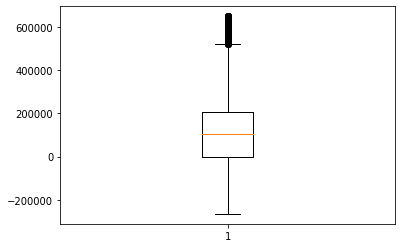

In [20]:
plt.boxplot(train['Manager_Business'])

In [21]:
train.loc[train['Manager_Business2']>500000,'Manager_Business2']=np.mean(train['Manager_Business2'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fe81bfbd9d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe81bfc1a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe81bfc8a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe81bfc8510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe81bfbdf50>,
  <matplotlib.lines.Line2D at 0x7fe81bfc14d0>]}

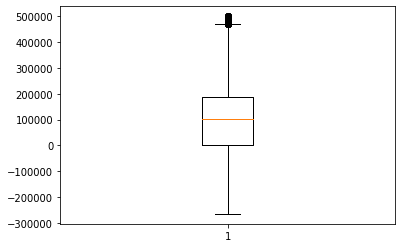

In [22]:
plt.boxplot(train['Manager_Business2'])

In [23]:
train.head()

,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
ID,,,,,,,,,,,,,,,,,,,,,,
FIN1000001,842001,4/16/2007,844120.0,1.0,12/19/1971,1.0,0.0,3.0,11/10/2005,1.0,2.0,3.0,1.0,1.0,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
FIN1000002,842001,4/16/2007,844111.0,1.0,2/17/1983,0.0,0.0,1.0,11/10/2005,1.0,2.0,3.0,1.0,1.0,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
FIN1000003,800001,4/16/2007,844101.0,1.0,1/16/1966,1.0,2.0,1.0,5/27/2006,1.0,1.0,2.0,1.0,1.0,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
FIN1000004,814112,4/16/2007,814112.0,1.0,2/3/1988,0.0,1.0,1.0,8/21/2003,1.0,3.0,4.0,1.0,0.0,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
FIN1000005,814112,4/16/2007,815351.0,1.0,7/4/1985,1.0,0.0,1.0,5/8/2006,1.0,1.0,2.0,1.0,1.0,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [24]:
x_train=train.drop(['Business_Sourced','Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB'],axis=1)

In [25]:
y_train=train['Business_Sourced']

In [26]:
x_train.head()

,Office_PIN,Applicant_City_PIN,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
ID,,,,,,,,,,,,,,,,,
FIN1000001,842001,844120.0,1.0,1.0,0.0,3.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,335249.0,28.0,335249.0,28.0
FIN1000002,842001,844111.0,1.0,0.0,0.0,1.0,1.0,2.0,3.0,1.0,1.0,2.0,1.0,335249.0,28.0,335249.0,28.0
FIN1000003,800001,844101.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,357184.0,24.0,357184.0,24.0
FIN1000004,814112,814112.0,1.0,0.0,1.0,1.0,1.0,3.0,4.0,1.0,0.0,0.0,0.0,318356.0,22.0,318356.0,22.0
FIN1000005,814112,815351.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,230402.0,17.0,230402.0,17.0


In [27]:
test=test.drop(['Application_Receipt_Date','Applicant_BirthDate','Manager_DOJ','Manager_DoB'],axis=1)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
logreg=DecisionTreeClassifier(max_features=10,criterion="entropy", max_depth=12)

In [91]:
logreg.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
pred=logreg.predict(test)

In [93]:
logreg.score(x_train,y_train)

0.7238375144326651

In [94]:
test_Business_Sourced=pred

In [95]:
result={'ID':test.index,'Business_Sourced':pred}
output=pd.DataFrame(result)

In [96]:
output['Business_Sourced'].value_counts()

0    4172
1     873
Name: Business_Sourced, dtype: int64

In [97]:
output.to_csv('Sample_Submission.csv',index=False)

In [234]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
#logreg=RandomForestRegressor(max_depth=20,n_estimators=250)
logreg=RandomForestRegressor(n_estimators = 300,max_depth=20, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 50)


In [235]:
logreg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=True,
                      random_state=50, verbose=0, warm_start=False)

In [236]:
pred=logreg.predict(test)


In [237]:
logreg.score(x_train,y_train)


0.11392508462059203

In [238]:
test_Business_Sourced=pred

In [231]:
result={'ID':test.index,'Business_Sourced':pred}
output=pd.DataFrame(result)

In [239]:
output['Business_Sourced'].value_counts()


0.307965    8
0.424808    8
0.296072    5
0.478797    5
0.559151    5
           ..
0.098607    1
0.405682    1
0.349136    1
0.231274    1
0.296350    1
Name: Business_Sourced, Length: 4778, dtype: int64

In [240]:
output.to_csv('Sample_Submission.csv',index=False)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

0.6570798782407893

0    5045
Name: Business_Sourced, dtype: int64